# How to made dumplings at home?

## Step 1: Make Dough

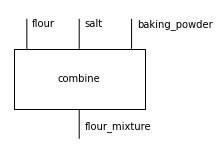

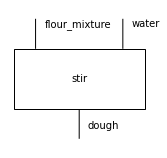

In [1]:
from discopy import Ob, Ty, Box, Id

flour, baking_powder, salt, water = Ty('flour'), Ty('baking_powder'), Ty('salt'), Ty('water')
flour_mixture, dough = Ty('flour_mixture'),Ty('dough')

combine = Box('combine', flour@salt@baking_powder, flour_mixture)
stir = Box('stir', flour_mixture@water, dough)

combine.draw(figsize=(2, 2))
stir.draw(figsize=(2, 2))

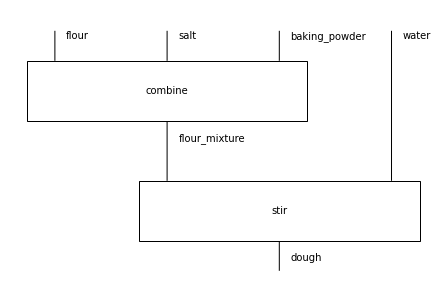

In [2]:
dough_recipe = combine @ Id(water)\
            >> stir
dough_recipe.draw(aspect='auto')

## Step 2: Prepare the Dumpling Filling

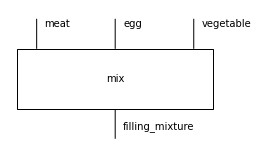

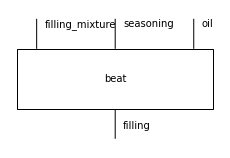

In [3]:
meat, egg, vegetable,oil = Ty('meat'), Ty('egg'), Ty('vegetable'), Ty('oil')
filling_mixture, filling, seasoning = Ty('filling_mixture'), Ty('filling'),Ty('seasoning')

mix = Box('mix', meat@egg@vegetable, filling_mixture)
beat = Box('beat', filling_mixture@seasoning@oil, filling)

mix.draw(figsize=(3, 2))
beat.draw(figsize=(3, 2))

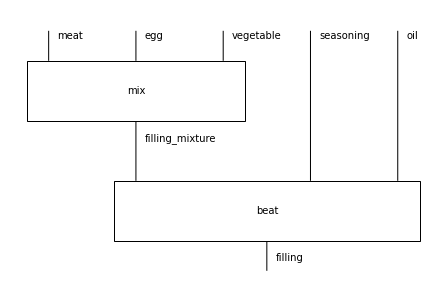

In [4]:
filling_recipe = mix @ Id(seasoning) @Id(oil)\
    >> beat
filling_recipe.draw(aspect='auto')

## Step 3: Rolling Dumpling Wrappers

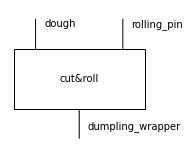

In [5]:
rolling_pin = Ty('rolling_pin')
dumpling_wrapper = Ty('dumpling_wrapper')

cut_roll = Box('cut&roll', dough@rolling_pin, dumpling_wrapper)
cut_roll.draw(figsize=(2, 2))

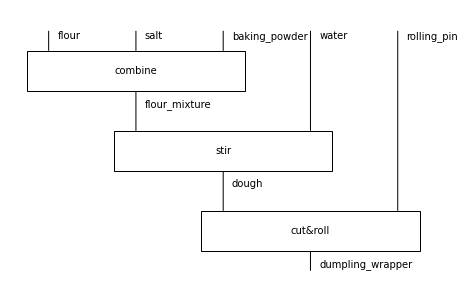

In [6]:
dumpling_wrapper_recipe = dough_recipe @ Id(rolling_pin)\
                            >> cut_roll

dumpling_wrapper_recipe.draw(aspect='auto')

## Step 4: Assembing the Dumplings

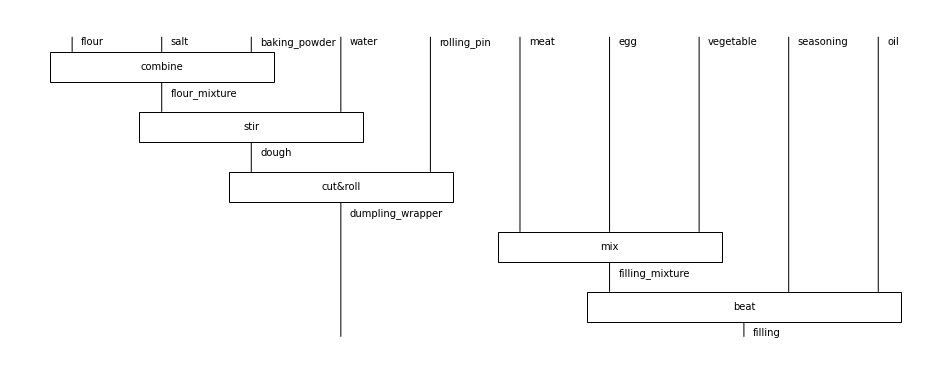

In [7]:
prepare_phase = dumpling_wrapper_recipe @ filling_recipe
prepare_phase.draw(figsize=(13, 5))

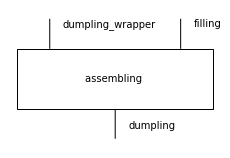

In [8]:
dumpling = Ty('dumpling')
assembling = Box('assembling ', dumpling_wrapper@filling, dumpling)

assembling .draw(figsize=(3, 2))

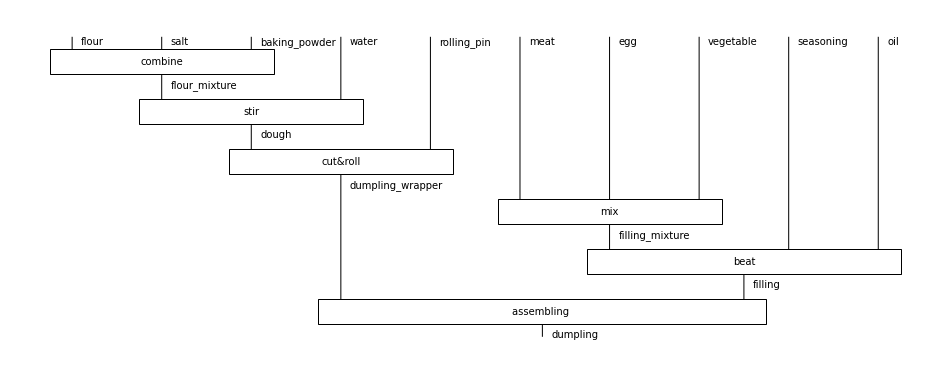

In [9]:
dumpling_recipe = prepare_phase >> assembling 
#dumpling_recipe = dumpling_wrapper_recipe @ filling_recipe >> assembling 
dumpling_recipe.draw(figsize=(13, 5))

In [11]:
from discopy import Diagram

def pretty(diagram):
    return "Diagram(\n"\
    + "    dom={},\n".format(repr(diagram.dom))\
    + "    cod={},\n".format(repr(diagram.cod))\
    + "    boxes=[{}],\n".format(',\n           '.join(map(repr, diagram.boxes)))\
    + "    offsets={})".format(diagram.offsets)

assertion = "dumpling_recipe == {}".format(pretty(dumpling_recipe))

exec(assertion)
print(assertion)

dumpling_recipe == Diagram(
    dom=Ty('flour', 'salt', 'baking_powder', 'water', 'rolling_pin', 'meat', 'egg', 'vegetable', 'seasoning', 'oil'),
    cod=Ty('dumpling'),
    boxes=[Box('combine', Ty('flour', 'salt', 'baking_powder'), Ty('flour_mixture')),
           Box('stir', Ty('flour_mixture', 'water'), Ty('dough')),
           Box('cut&roll', Ty('dough', 'rolling_pin'), Ty('dumpling_wrapper')),
           Box('mix', Ty('meat', 'egg', 'vegetable'), Ty('filling_mixture')),
           Box('beat', Ty('filling_mixture', 'seasoning', 'oil'), Ty('filling')),
           Box('assembling ', Ty('dumpling_wrapper', 'filling'), Ty('dumpling'))],
    offsets=[0, 0, 0, 1, 1, 0])


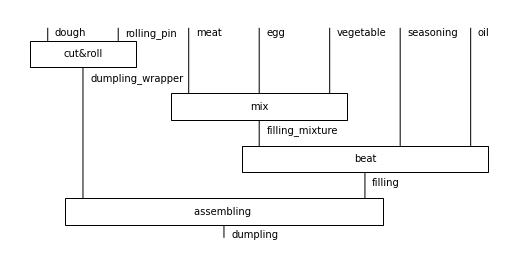

In [12]:
from discopy import drawing

wrapper = Box("cut&roll",  dough @ rolling_pin, dumpling_wrapper )


crack2_then_beat = wrapper @ filling_recipe >> assembling

drawing.equation(crack2_then_beat, figsize=(7, 3.5))